<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf

import cProfile

tf.executing_eagerly()

True

In [ ]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int64)
     ))

dataset = dataset.shuffle(1000).batch(32)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu',
                                                          input_shape=(None, None, 1)),
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.summary()

# Logit: Values used as input to softmax


for images, labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 16)    160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________
Logits:  [[ 0.00121988 -0.04408433  0.02608965 -0.02081358 -0.03080192  0.02321623
   0.05760741  0.00467529  0.0275059  -0.04941407]]


In [ ]:
# Keras models have builtin training loop ('fit' method)
# More customization

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

def train_step(images, labels):
  # Use to inspect computes gradients
  with tf.GradientTape() as tape:
      logits = mnist_model(images, training=True)

      tf.debugging.assert_equal(logits.shape, (32,10))

      loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))


def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)

    print('Epoch {} finished'.format(epoch))

train(epochs=3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [Entropy]')

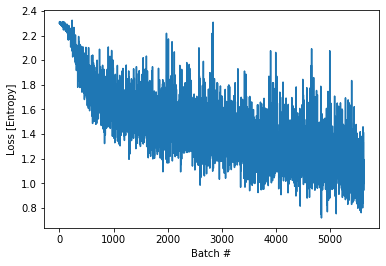

In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel("Loss [Entropy]")

In [ ]:
# Short

x = tf.ones((2,2))

with tf.GradientTape(persistent=True) as t:
  t.watch(x)

  y = tf.reduce_sum(x)
  z = tf.multiply(y,y)


dz_dx = t.gradient(z,x)
dz_dy = t.gradient(z,y)
print(dz_dy)
print(dz_dx)


del t

tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
####################
# START HERE
import os
import tensorflow as tf
import cProfile

tf.executing_eagerly()

x = [[2.]]
m = tf.matmul(x,x)
print(m)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


In [ ]:
x = [[2., 3.]]
y = [[1.], [4.]]

a = tf.constant([[1,2], [3,4]])

print(tf.matmul(x,y))
print(a)

b = tf.add(a,1)
print(b)

c = a + 1
print(c)

# Overloading
print(a*b)

# Obtain numpy value from tensor
print(a.numpy())

def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)

  for num in range(1, max_num.numpy() + 1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int (num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

fizzbuzz(15)

tf.Tensor([[14.]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)
[[1 2]
 [3 4]]
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


In [ ]:
w = tf.Variable([[1.]])
print(w)

with tf.GradientTape() as tape:
  loss = w*w

grad = tape.gradient(loss, w)
print(grad)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>
tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [ ]:
# Train model
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    
  (tf.cast(mnist_images[...,tf.newaxis] / 255, tf.float32),
   tf.cast(mnist_labels, tf.int64)
   ))

dataset = dataset.shuffle(1000).batch(32)



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_model = tf.keras.Sequential([
                                   
  tf.keras.layers.Conv2D(16, [3,3], activation='relu', input_shape=(None, None,1)),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

for images,labels in dataset.take(1):
  print(mnist_model(images[0:1]).numpy())

[[-0.04099802 -0.00272278 -0.03153814 -0.00655243  0.00691699  0.00079763
   0.01094932  0.02273444  0.03199681  0.05127069]]


In [1]:
#################################
# Diven into Deep Learning
#################################

!pip install d2l

     |████████████████████████████████| 83 kB 1.5 MB/s 


In [ ]:
#################################
# Diven into Deep Learning
#################################


######
# Ch 2
######

# 2.1

x = tf.range(12)
x

print(x.shape)
print(tf.size(x))

# -1 --> Automatically calculates dimnension
x = tf.reshape(x, (3,-1))
print(x)

print(tf.zeros((2,3,4)))
print(tf.ones((2,3,4)))


# Each element is randomly sampled from standard Gaussian (mean 0; stddev 1)
print(tf.random.normal(shape=[3,4]))


# Elementwise operations
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])

print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x**y)

(12,)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[ 0.7257188   0.10995621  1.7581837   0.7951681 ]
 [-1.1187122  -0.31241304  0.25750652 -0.68812513]
 [-1.1525211  -0.3142537  -1.7743869   0.8678267 ]], shape=(3, 4), dtype=float32)
tf.Tensor([ 3.  4.  6. 10.], shape=(4,), dtype=float32)
tf.Tensor([-1.  0.  2.  6.], shape=(4,), dtype=float32)
tf.Tensor([ 2.  4.  8. 16.], shape=(4,), dtype=float32)
tf.Tensor([0.5 1.  2.  4. ], shape=(4,), dtype=float32)
tf.Tensor([ 1.  4. 16. 64.], shape=(4,), dtype=float32)


In [ ]:
# Concat tensors

X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

C1 = tf.concat([X,Y], axis=0)
print(X)
print(Y)
print(C1)

# Logical elementwise operation
print(X == Y)

# Sum all elements up
print(tf.reduce_sum(X))

tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [ 2.  1.  4.  3.]
 [ 1.  2.  3.  4.]
 [ 4.  3.  2.  1.]], shape=(6, 4), dtype=float32)
tf.Tensor(
[[False  True False  True]
 [False False False False]
 [False False False False]], shape=(3, 4), dtype=bool)
tf.Tensor(66.0, shape=(), dtype=float32)


In [ ]:
# Apply elementwise operation on tensors of different size
a = tf.reshape(tf.range(3), (3,1))
b = tf.reshape(tf.range(2), (1,2))

print(a)
print(b)
print(a+b)

tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int32)
tf.Tensor([[0 1]], shape=(1, 2), dtype=int32)
tf.Tensor(
[[0 1]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int32)


In [ ]:
# Indexing

# Tensors are immutable -> Create separate variable
X = tf.random.normal(shape=(4,4))
X_var = tf.Variable(X)
X_var[::2, :].assign(tf.zeros(X_var[::2,:].shape, dtype=tf.float32))
print(X_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.27325052, -0.3079145 , -0.13030295,  0.09439538],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.27838826,  0.36249298, -1.060316  , -1.0434628 ]],
      dtype=float32)>


In [ ]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

before = id(Y)
Y = Y + X
id(Y) == before

Z = tf.Variable(tf.zeros_like(Y))
print('id(Z):', id(Z))
print('id(Z):', id(Z))

# tf.function decorator to wrap computation inside of TensorFlow graph
@tf.function
def computation(X,Y):
  Z = tf.zeros_like(Y)
  A = X + Y     # Allocations will be reused
  B = A + Y
  C = B + Y
  return C + Y

computation(X,Y)

id(Z): 140060173849680
id(Z): 140060173849680


<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 8.,  9., 26., 27.],
       [24., 33., 42., 51.],
       [56., 57., 58., 59.]], dtype=float32)>

In [ ]:
A = X.numpy()
B = tf.constant(A)
print(type(A))
print(type(B))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# 2.2 - Data Preprocessing

import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
  f.write('NumRooms, Alley, Price\n')
  f.write('NA, Pave, 127500\n')
  f.write('2, NA, 106000\n')
  f.write('4, NA, 178100\n')
  f.write('NA, NA, 140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms  Alley   Price
0       NaN   Pave  127500
1       2.0     NA  106000
2       4.0     NA  178100
3       NaN     NA  140000


In [ ]:
import numpy as np

inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]

notNAValMatrix = np.array(inputs.notna())


max = np.max(np.sum(notNAValMatrix + 0, axis=1))

filtered = inputs.dropna(thresh=max)

print(filtered)

# Fill missing inputs by average of available data points
inputs = inputs.fillna(inputs.mean())
print(inputs)

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

# All values are numeric --> can be converted to tensors

X, y = tf.constant(inputs.values), tf.constant(outputs)
X,y

   NumRooms  Alley
1       2.0     NA
2       4.0     NA
   NumRooms  Alley
0       3.0   Pave
1       2.0     NA
2       4.0     NA
3       3.0     NA
   NumRooms   Alley_ NA   Alley_ Pave   Alley_nan
0       3.0           0             1           0
1       2.0           1             0           0
2       4.0           1             0           0
3       3.0           1             0           0


(<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
 array([[3., 0., 1., 0.],
        [2., 1., 0., 0.],
        [4., 1., 0., 0.],
        [3., 1., 0., 0.]])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([127500, 106000, 178100, 140000])>)

In [ ]:
# 2.3 Linear Algebra
import tensorflow as tf

## Scalars
x = tf.constant(3.0)
print(x)

## Matrices

A = tf.reshape(tf.range(20), (5,4))
print(A)

print(tf.transpose(A))

### Symmetric matrix
B = tf.constant([[1,2,3],[2,0,4], [3,4,5]])
print(B == tf.transpose(B))


## Tensors
X = tf.reshape(tf.range(24), (2,3,4))
print(X)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]], shape=(5, 4), dtype=int32)
tf.Tensor(
[[ 0  4  8 12 16]
 [ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]], shape=(4, 5), dtype=int32)
tf.Tensor(
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]], shape=(3, 3), dtype=bool)
tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]], shape=(2, 3, 4), dtype=int32)


In [ ]:
print(tf.transpose(X))


### Hadamard product
A = tf.reshape(tf.range(20, dtype=tf.float32), (5,4))
B = A

A * B

### Multiply by scalar
a = 2
print(X.shape)
print((a*X).shape)

### Reductions

#### Sum
A = tf.reshape(tf.range(20), (5,4))
print(A,tf.reduce_sum(A, axis=0))

# Keep axes after reduction
A = tf.reshape(tf.range(20), (5,4))
sum_A = tf.reduce_sum(A, axis=1, keepdims=True)
print(A / sum_A)
print(tf.reduce_sum(A / sum_A))

#### Mean
N = tf.random.normal(shape=(700,700))
print(tf.reduce_mean(N))

#### Cumulative sum
print(tf.cumsum(A, axis=0))

tf.Tensor(
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]], shape=(4, 3, 2), dtype=int32)
(2, 3, 4)
(2, 3, 4)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]], shape=(5, 4), dtype=int32) tf.Tensor([40 45 50 55], shape=(4,), dtype=int32)
tf.Tensor(
[[0.         0.16666667 0.33333333 0.5       ]
 [0.18181818 0.22727273 0.27272727 0.31818182]
 [0.21052632 0.23684211 0.26315789 0.28947368]
 [0.22222222 0.24074074 0.25925926 0.27777778]
 [0.22857143 0.24285714 0.25714286 0.27142857]], shape=(5, 4), dtype=float64)
tf.Tensor(4.999999999999999, shape=(), dtype=float64)
tf.Tensor(-0.00091385265, shape=(), dtype=float32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]
 [40 45 50 55]], shape=(5, 4), dtype=int32)


In [ ]:
### Dot product
y = tf.ones(4, dtype=tf.float32)
print(tf.tensordot(x,y,axes=1))

A = tf.reshape(tf.range(20), (5,4))
B = tf.reshape(tf.range(20), (4,5))

print(A)
print(B)
print(tf.tensordot(A,B, axes=0))

tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]], shape=(5, 4), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]], shape=(4, 5), dtype=int32)
tf.Tensor(
[[[[  0   0   0   0   0]
   [  0   0   0   0   0]
   [  0   0   0   0   0]
   [  0   0   0   0   0]]

  [[  0   1   2   3   4]
   [  5   6   7   8   9]
   [ 10  11  12  13  14]
   [ 15  16  17  18  19]]

  [[  0   2   4   6   8]
   [ 10  12  14  16  18]
   [ 20  22  24  26  28]
   [ 30  32  34  36  38]]

  [[  0   3   6   9  12]
   [ 15  18  21  24  27]
   [ 30  33  36  39  42]
   [ 45  48  51  54  57]]]


 [[[  0   4   8  12  16]
   [ 20  24  28  32  36]
   [ 40  44  48  52  56]
   [ 60  64  68  72  76]]

  [[  0   5  10  15  20]
   [ 25  30  35  40  45]
   [ 50  55  60  65  70]
   [ 75  80  85  90  95]]

  [[  0   6  12  18  24]
   [ 30  36  42  48  54]
   [ 60  66  72  78  84]
   [ 90  96 102 108 114]]

  [[  

In [ ]:
### Norms

#### L2 norm by standard
u = tf.constant([3.0, -4.0])
print(tf.norm(u))

#### L1 norm
print(tf.reduce_sum(tf.abs(u)))

#### Frobenius norm (matrix)


tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(7.0, shape=(), dtype=float32)


In [6]:
## 2.4 Calculus
!pip install d2l
%matplotlib inline

import numpy as np
from IPython import display
from d2l import tensorflow as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

def numerical_lim(f,x,h):
  return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
  print(numerical_lim(f,1,h))
  h *= 0.1

     |████████████████████████████████| 83 kB 1.7 MB/s 
2.3000000000000043
2.029999999999976
2.0029999999993104
2.000299999997956
2.0000300000155837


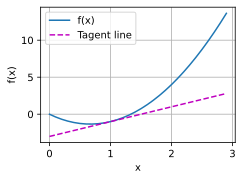

In [8]:
from IPython import display
import numpy as np
from d2l import tensorflow as d2l

# Specifices to use svg figures
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# For plotting mutliple curves
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear',
        yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  if legend is None:
    legend = []

  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  def has_one_axis(X):
      return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], '__len__'))

  if has_one_axis(X):
    X = [X]
  if Y is None:
      X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()

  for x,y, fmt in zip(X,Y,fmts):
    if len(x):
      axes.plot(x,y,fmt)
    else:
      axes.plot(y,fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)



x = np.arange(0,3,0.1)

def f(x):
  return 3 * x ** 2 - 4 * x 

plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tagent line'])

In [14]:
## 2.5 Automatic Differentiation

import tensorflow as tf

x = tf.range(4, dtype=tf.float32)
print(x)

x = tf.Variable(x)

with tf.GradientTape() as t:
  y = 2 * tf.tensordot(x,x, axes=1)

x_grad = t.gradient(y,x)
x_grad

### Backward for Non-Scalar Variables

with tf.GradientTape() as t:
  y = x * x

t.gradient(y,x)

tf.Tensor([0. 1. 2. 3.], shape=(4,), dtype=float32)


(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>)

In [39]:
with tf.GradientTape(persistent=True) as t:
  y = x * x
  u = tf.stop_gradient(y)
  z = u * x

x_grad = t.gradient(z,x)


# Calculate Gradient of Control Flow
def f(a):
  b = a * 2
  while tf.norm(b) < 1000:
    b = b * 2
  if tf.reduce_sum(b) > 0:
    c = b
  else:
    c = 100 * b
  return c

a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape() as t:
  d = f(a)

d_grad = t.gradient(d,a)
d_grad


### Exercises

# 5


AttributeError: ignored

In [ ]:
## 2.6 Probability